In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error

In [27]:
# Show all rows and columns
pd.set_option('display.max_rows', None)  # Show all rows
pd.set_option('display.max_columns', None)  # Show all columns
# Increase column width
pd.set_option('display.max_colwidth', None)  # Remove column width limit

In [28]:
df = pd.read_csv("D:\\Ameri\\Kaggle\\HousingPricesCompetition\\Judging\\train.csv")
test_df = pd.read_csv("D:\\Ameri\\Kaggle\\HousingPricesCompetition\\Judging\\test.csv")

In [29]:
df.info()
row, col = df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [30]:
for name in test_df:
    if (not name in df): continue
    if ((df[name].nunique() < test_df[name].nunique()) and isinstance(name, str)):
        print(name, type(name), df[name].nunique(), test_df[name].nunique())

MSSubClass <class 'str'> 15 16
LotFrontage <class 'str'> 110 115
LotArea <class 'str'> 1073 1106
BsmtFinSF1 <class 'str'> 637 669
BsmtFinSF2 <class 'str'> 144 161
BsmtUnfSF <class 'str'> 780 793
TotalBsmtSF <class 'str'> 721 736
1stFlrSF <class 'str'> 753 789
GrLivArea <class 'str'> 861 879
FullBath <class 'str'> 4 5
Fireplaces <class 'str'> 4 5
GarageCars <class 'str'> 5 6
GarageArea <class 'str'> 441 459
OpenPorchSF <class 'str'> 202 203
EnclosedPorch <class 'str'> 120 131
MiscVal <class 'str'> 21 26


In [31]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [32]:
test_df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType        894
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinSF1          1
BsmtFinType2       42
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [33]:
for name in df.columns:
    if (not name in df.columns): continue
    if (not name in test_df.columns): continue

    if (df[name].isnull().sum() >= row / 2 or test_df[name].isnull().sum() >= row / 2):
        df = df.drop([name], axis = 1)
        test_df = test_df.drop([name], axis = 1)
        continue
        
    if (isinstance(df[name][0], str)):
        df[name] = df[name].fillna(df[name].mode()[0])
    else: 
        df[name] = df[name].fillna(df[name].mean())

    if (isinstance(test_df[name][0], str)):
        test_df[name] = test_df[name].fillna(test_df[name].mode()[0])
    else: 
        test_df[name] = test_df[name].fillna(test_df[name].mean())


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<Axes: >

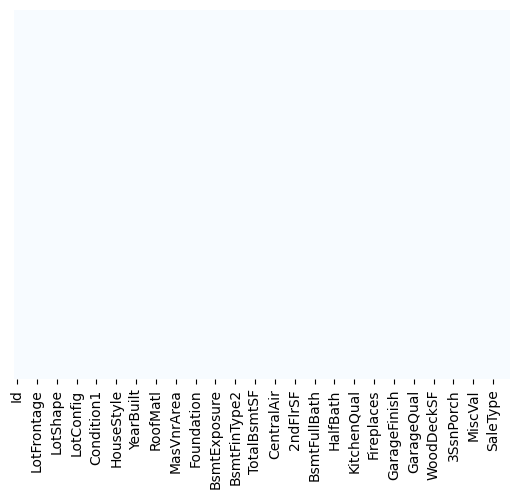

In [35]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues')

In [36]:
def category_onehot_multcols():
    df_final=final_df
    i=0
    for fields in df.columns:
        if (not isinstance(df[fields][0], str)): continue
        
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [37]:
final_df=pd.concat([df,test_df],axis=0)
final_df=category_onehot_multcols()

In [38]:
final_df =final_df.loc[:,~final_df.columns.duplicated()]
df_train=final_df.iloc[:1460,:]
df_test=final_df.iloc[1460:,:]

df_test.drop(['SalePrice'], axis = 1, inplace = True)
X_train = df_train.drop(['SalePrice'], axis = 1)
y_train = df_train['SalePrice']

C:\Users\ASUS Zenbook\AppData\Local\Temp\ipykernel_24580\293363000.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.drop(['SalePrice'], axis = 1, inplace = True)


0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
30      False
31      False
32      False
33      False
34      False
35      False
36      False
37      False
38      False
39      False
40      False
41      False
42      False
43      False
44      False
45      False
46      False
47       True
48      False
49      False
50      False
51      False
52      False
53      False
54      False
55      False
56       True
57      False
58      False
59      False
60      False
61      False
62      False
63      False
64      False
65      False
66      False
67      False
68      False
69      False
70      False
71    

In [ ]:
result = []
for i in range(df_test.shape[0]): result.append(1000000000)
for i in range(1):
    forest_model = RandomForestRegressor()
    forest_model.fit(X_train, y_train)

    for j in range(df_test.shape[0]):
        row = df_test.iloc[j].tolist()
        result[j] = min(result[j], forest_model.predict(np.array(row).reshape(1, -1))[0])

output = []
output.append(['Id', 'SalePrice'])
for i in range(df_test.shape[0]):
    value = [str(df_test['Id'][i]), str(result[i])]
    output.append(value)

filename = 'D:\Ameri\Kaggle\HousingPricesCompetition\submission.csv'
with open(filename, 'w', newline = '') as file:
    writer = csv.writer(file)
    writer.writerows(output)

<>:17: SyntaxWarning: invalid escape sequence '\A'
<>:17: SyntaxWarning: invalid escape sequence '\A'
C:\Users\ASUS Zenbook\AppData\Local\Temp\ipykernel_24580\2923922589.py:17: SyntaxWarning: invalid escape sequence '\A'
  filename = 'D:\Ameri\Kaggle\HousingPricesCompetition\submission.csv'
C:\Users\ASUS Zenbook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS Zenbook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\ASUS Zenbook\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.war